# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['kavieng', 'jamestown', 'tommot', 'walvis bay', 'ushuaia', 'kaitangata', 'torbay', 'finsterwalde', 'puerto ayora', 'boa vista', 'sao felix do xingu', 'la ronge', 'norman wells', 'piedra gorda', 'tuatapere', 'kiunga', 'mwingi', 'ulladulla', 'hobart', 'marcona', 'mataura', 'atuona', 'arraial do cabo', 'rikitea', 'punta arenas', 'nanortalik', 'saint-joseph', 'labuhan', 'san cristobal', 'cabo san lucas', 'oksbol', 'port moresby', 'chinhoyi', 'olinda', 'payo', 'pipar', 'gushikawa', 'yar-sale', 'chegdomyn', 'kenora', 'hilo', 'talaya', 'milingimbi', 'saldanha', 'port alfred', 'aruppukkottai', 'tumannyy', 'esperance', 'alice springs', 'jinhua', 'bethalto', 'kapaa', 'mataram', 'nikolskoye', 'busselton', 'moshenskoye', 'provideniya', 'illoqqortoormiut', 'kruisfontein', 'qaanaaq', 'brae', 'gizo', 'victoria', 'hasaki', 'barentsburg', 'sambava', 'rocha', 'cape town', 'new norfolk', 'bengkulu', 'saint-philippe', 'katherine', 'saleaula', 'tiksi', 'amderma', 'yellowknife', 'zhitikara', 'west bay', 'a

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Building API Calls

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"

# Building a Dictionary to store data
city_weather = {"City": [],
             "Lat": [],
             "Lng": [],
             "Max Temp": [],
             "Humidity": [],
             "Cloudiness": [],
             "Wind Speed": [],
             "Country": [],
             "Date": []}


# Params Dictionary
params = {
    "api_key":weather_api_key,
    "units":units,
    "city":city}
    

# Getting Weather Data
response = requests.get(query_url).json()

# print(response)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 62
    },
    "cod": 200,
    "coord": {
        "lat": -2.5744,
        "lon": 150.7967
    },
    "dt": 1658892676,
    "id": 2094342,
    "main": {
        "feels_like": 32.9,
        "grnd_level": 1005,
        "humidity": 64,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 29.63,
        "temp_max": 29.63,
        "temp_min": 29.63
    },
    "name": "Kavieng",
    "sys": {
        "country": "PG",
        "sunrise": 1658865797,
        "sunset": 1658908986
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 98,
        "gust": 6.28,
        "speed": 5.81
    }
}


In [4]:
print("----------------------------- Beginning Data Retrieval  -----------------------------")
    
    # Looping through city list and then appendinig results into dictionary
for city in cities:
    query_url = f"{base_url}appid={weather_api_key}&units=Imperial&q={city}"
    response = requests.get(query_url).json()
        
    try:
        print(f'Processing Weather Data for Record  {response["name"]}')
        
        city_weather["City"].append(response["name"])
        city_weather["Lat"].append(response["coord"]["lat"])
        city_weather["Lng"].append(response["coord"]["lon"])
        city_weather["Max Temp"].append(response["main"]["temp_max"])
        city_weather["Humidity"].append(response["main"]["humidity"])
        city_weather["Cloudiness"].append(response["clouds"]["all"])
        city_weather["Wind Speed"].append(response["wind"]["speed"])
        city_weather["Country"].append(response["sys"]["country"])
        city_weather["Date"].append(response["dt"])

    except(KeyError, IndexError):
        print(f"{city} not found, on to the next one!")
            time.sleep(60)
    pass
    
print("----------------------------- Data Retrieval Complete -----------------------------")

----------------------------- Beginning Data Retrieval  -----------------------------
Processing Weather Data for Record 1 of Set 1 | Kavieng
Processing Weather Data for Record 2 of Set 1 | Jamestown
Processing Weather Data for Record 3 of Set 1 | Tommot
Processing Weather Data for Record 4 of Set 1 | Walvis Bay
Processing Weather Data for Record 5 of Set 1 | Ushuaia
Processing Weather Data for Record 6 of Set 1 | Kaitangata
Processing Weather Data for Record 7 of Set 1 | Torbay
Processing Weather Data for Record 8 of Set 1 | Finsterwalde
Processing Weather Data for Record 9 of Set 1 | Puerto Ayora
Processing Weather Data for Record 10 of Set 1 | Boa Vista
Processing Weather Data for Record 11 of Set 1 | São Félix do Xingu
Processing Weather Data for Record 12 of Set 1 | La Ronge
Processing Weather Data for Record 13 of Set 1 | Norman Wells
Processing Weather Data for Record 14 of Set 1 | Piedra Gorda
Processing Weather Data for Record 15 of Set 1 | Tuatapere
Processing Weather Data fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating a DataFrame
city_data_df = pd.DataFrame(city_weather)
# Exporting to CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,85.33,64,62,13.00,PG,1658892676
1,Jamestown,42.0970,-79.2353,65.84,69,40,0.00,US,1658892147
2,Tommot,58.9564,126.2925,84.20,35,23,6.69,RU,1658892676
3,Walvis Bay,-22.9575,14.5053,41.95,87,0,3.44,NA,1658892676
4,Ushuaia,-54.8000,-68.3000,35.26,55,0,4.61,AR,1658892327
...,...,...,...,...,...,...,...,...,...
553,Qasigiannguit,68.8193,-51.1922,43.05,98,100,2.77,GL,1658892827
554,Bilma,18.6853,12.9164,85.86,13,43,4.52,NE,1658892827
555,Ust-Tsilma,65.4410,52.1498,66.18,43,86,6.06,RU,1658892828
556,Henties Bay,-22.1160,14.2845,52.39,84,20,4.81,NA,1658892828


In [6]:
# Creating a Summary Stats Table
lat = city_data_df["Lat"]
lng = city_data_df["Lng"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
date = city_data_df["Date"]

data_table = pd.DataFrame({"Lat":lat,
                          "Lng":lng,
                          "Max Temp":max_temp,
                          "Humidity":humidity,
                          "Cloudiness":cloudiness,
                          "Wind Speed":wind_speed,
                          "Date":date})
data_table.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-2.5744,150.7967,85.33,64,62,13.00,1658892676
1,42.0970,-79.2353,65.84,69,40,0.00,1658892147
2,58.9564,126.2925,84.20,35,23,6.69,1658892676
3,-22.9575,14.5053,41.95,87,0,3.44,1658892676
4,-54.8000,-68.3000,35.26,55,0,4.61,1658892327


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
print(data_table.loc[data_table['Humidity'] > 100])

Empty DataFrame
Columns: [Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Date]
Index: []


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.dropna(inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,85.33,64,62,13.00,PG,1658892676
1,Jamestown,42.0970,-79.2353,65.84,69,40,0.00,US,1658892147
2,Tommot,58.9564,126.2925,84.20,35,23,6.69,RU,1658892676
3,Walvis Bay,-22.9575,14.5053,41.95,87,0,3.44,NA,1658892676
4,Ushuaia,-54.8000,-68.3000,35.26,55,0,4.61,AR,1658892327


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

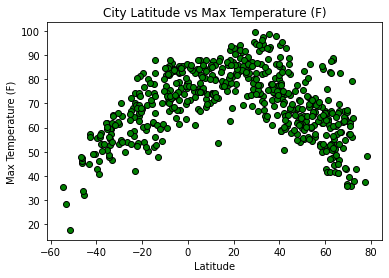

In [9]:
plt.scatter(city_weather["Lat"],city_weather["Max Temp"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

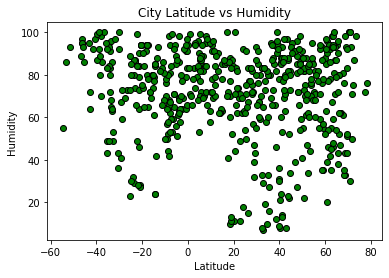

In [10]:
plt.scatter(city_weather["Lat"],city_weather["Humidity"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

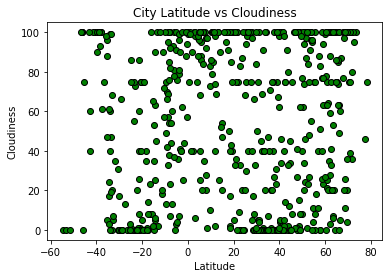

In [11]:
plt.scatter(city_weather["Lat"],city_weather["Cloudiness"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

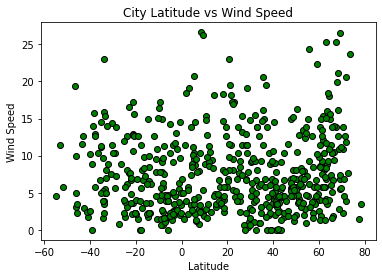

In [12]:
plt.scatter(city_weather["Lat"],city_weather["Wind Speed"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [13]:
# First Separate Northern Hemisphere from Southern Hemisphere

northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

In [14]:
# Creating a function for Linear Regression

def linregress(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Function for annotation 

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Max Temp"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(linregress,(5.8,0.8),fontsize=15,color="green",edgecolor="black")

# Formatting
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Max Temp and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Max Temp vs Latitude Linear Regression")


NameError: name 'st' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Max Temp"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(linregress,(5.8,0.8),fontsize=15,color="green",edgecolor="black")

# Formatting
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Max Temp and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Humidity"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(linregress,(5.8,0.8),fontsize=15,color="green",edgecolor="black")

# Formatting
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Humidity and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Humidity vs Latitude Linear Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Humidity"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(linregress,(5.8,0.8),fontsize=15,color="green",edgecolor="black")

# Formatting
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Humidity and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Humidity vs Latitude Linear Regression")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Cloudiness"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(linregress,(5.8,0.8),fontsize=15,color="green",edgecolor="black")

# Formatting
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Cloudiness and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Cloudiness vs Latitude Linear Regression")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Cloudiness"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(linregress,(5.8,0.8),fontsize=15,color="green",edgecolor="black")

# Formatting
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Cloudiness and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Cloudiness vs Latitude Linear Regression")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Wind Speed"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(linregress,(5.8,0.8),fontsize=15,color="green",edgecolor="black")

# Formatting
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Wind Speed (mph) and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Wind Speed"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(linregress,(5.8,0.8),fontsize=15,color="green",edgecolor="black")

# Formatting
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Wind Speed (mph) and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")


